###**Attention Mechanisms:-**

It is an important mechnisms that is used in deep learning that is used to give more importance to most important features where as it can ignore the less relevant features.

###**Importance of Attention Mechanisms:-**

1. It gives more imporatnce to the relevant features in the input sequence and ignore the less relevant features by assigning more weights to the relevant features while assigning less weights to the least relevant features.


###**Aim:-**

1.  We have an imdb movie review dataset, perform the attention mechanisms on the movie review dataset and predict whether the review is positive or negative.

### **Steps used in this Algorithm:-**

1.  Import all the necessary libraries

2.  Load the imdb movie review dataset

3.  Perform the padding on the input sequences

4.  Create the Custom attention layer

5.  Build the Model

6.  Compile the Model

7.  Train the model

8. Evaluate the model

9.  Plot the Accuracy vs Loss for the test data

10. Make the predictions on the test data

### Step 1.  Import all the necessary libraries

In [626]:
import   numpy              as   np
import   pandas             as   pd
import   matplotlib.pyplot  as  plt
import   seaborn            as  sns

import   tensorflow         as  tf

from     tensorflow.keras.datasets                import   imdb
from     tensorflow.keras.preprocessing.sequence  import   pad_sequences
from     tensorflow.keras.models                  import   Sequential, Model
from     tensorflow.keras.layers                  import   Dense, Dropout, Flatten, BatchNormalization, Input, Embedding, LSTM, Bidirectional, Layer

### **OBSERVATIONS:**

1.  Here all the necessary libraries that are imported will be used for performing the opeartions in Attention Mechanisms.

### Step 2: Load the imdb movie review dataset

In [627]:
### Divide the dataset into training and testing data

### define the vocabulary size for storing the top frequent words appearing in the dictionary
voc_size = 10000

(X_train,Y_train),(X_test, Y_test) = imdb.load_data(num_words=voc_size)

###**Input Data:**

In [628]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [629]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [630]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (25000,)
Shape of the input testing  data is: (25000,)


###**Output Data:**

In [631]:
Y_train

array([1, 0, 0, ..., 0, 1, 0])

In [632]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [633]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (25000,)
Shape of the output testing  data is: (25000,)


###**OBSERVATIONS:**

1.  Here the imdb movie review dataset is loaded with top 10000 most frequent words

2.  Then the imdb dataset is divided into training and testing data

3.  But all the input sequences are of the different length. So padding must be done to make all the input sequences as equal

4. This is because the RNN model accepts only fixed length sequences.

### Step 3: Perform the padding on the input sequences

In [634]:
### Perform the padding on the inputs

### define the maximum length for all the input sequences

max_len = 200

X_train = pad_sequences(X_train, maxlen=max_len)
X_test  = pad_sequences(X_test , maxlen=max_len)

In [635]:
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [636]:
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [1987,    2,   45, ...,  125,    4, 3077],
       [4468,  189,    4, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

###**OBSERVATIONS:**

1. Padding is applied on the input sequences of both training and testing data

2. All the input sequences are now of equal length of 200.

3. Padding is done as as to make all the input sequences as equal as the RNN Model can only work with the fixed length input sequence.

### Step 4: Create the Custom attention layer

In [637]:
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)


### **OBSERVATIONS:**

1. The Attention Class is created that assignes the weights to all the features used in the sequence.

2. It assignes the higher weights to the more important features and lower weights to the less important features and thus helps in identifying which words are more important and which words are less important.

3. It then computes the average weight of all the time steps.

### Step 5: Build the Model

In [638]:
### Define the input layer

input_text = Input(shape=(max_len,))

In [639]:
input_text

<KerasTensor shape=(None, 200), dtype=float32, sparse=False, ragged=False, name=keras_tensor_106>

In [640]:
### Shape of the input text

input_text.shape

(None, 200)

###**OBSERVATIONS:**

1.  Here we have defined the input text having the length of 200.

In [641]:
### Define the Embedding layer

embedding_text = Embedding(input_dim=voc_size, output_dim=128)(input_text)

In [642]:
embedding_text

<KerasTensor shape=(None, 200, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_107>

In [643]:
### Shape of the Embedding text

embedding_text.shape

(None, 200, 128)

###**OBSERVATIONS:**

1. Here embedding is applied on the input text which considers every word in integer format and then converts them into the dense dimensional vectors.

In [644]:
### define the lstm layer

lstm_out = LSTM(128, return_sequences=True)(embedding_text)

In [645]:
### Shape of the lstm output

lstm_out

<KerasTensor shape=(None, 200, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_108>

In [646]:
lstm_out.shape

(None, 200, 128)

###**OBSERVATIONS:**

1. LSTM stands for long short term memory that is capable of remembering the long term dependencies.

2. It processes the text word by word.

3. It is capable of remembering the information that has happened long time back.

4. LSTM layer has 128 hidden neurons and is applied on the embedding layer  where it returns the output at every timestamp.

5. So in this way, it keeps the track of all the outputs produced long time  back.

In [647]:
attention_out = Attention()(lstm_out)

In [648]:
attention_out

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_109>

In [649]:
### Shape of the attention layer

attention_out.shape

(None, 128)

###**OBSERVATIONS:**

1. In LSTM each and every word is in 128 dense dimensional vectors.

2. To detect which word is more important for prediction, attention layer is used.

In [650]:
### Create a dense layer

dense_layer = Dense(64,activation='relu')(attention_out)

In [651]:
dense_layers = Dropout(0.5)(dense_layer)

In [652]:
dense_layers

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_111>

In [653]:
dense_layers.shape

(None, 64)

### **OBSERVATIONS:**

1.  Dense layer is applied on the attention output and a fully connected dense neural network is formed with 64 hidden neurons in it

2.  Dropout is applied on the dense neural networks to reduce the overfitting.

In [654]:
### Create the output later

output_layer = Dense(1, activation='sigmoid')(dense_layers)

In [655]:
output_layer

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_112>

In [656]:
output_layer.shape

(None, 1)

###**OBSERVATIONS:**

1. The final output layer is formed with 1 hidden layer in it and sigmoid activation function is applied on it  to predict whether the review is positive or negative.

In [657]:
### Build the Model

model = Model(inputs = input_text, outputs = output_layer)

In [658]:
model

<Functional name=functional_7, built=True>

In [659]:
### Get the summary of the model

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_21 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 200, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_14 (Attention)        │ (None, 128)            │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,233 (5.42 MB)

 Trainable params: 1,420,233 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Compile the Model

In [660]:
### Compile the model

model.compile(
    optimizer     =          'adam'                    ,
    loss          =          'binary_crossentropy'     ,
    metrics       =          ['accuracy']
)

### **OBSERVATIONS:**


1.  The model has been made ready for the training purpose with the help of the following parameters.


   (a.)   optimizer = 'adam' . It is used to make the learning rate as dynamic and improves the convergence speed.


   (b.)   loss = 'binary_crossentropy'. It is a binary loss function as it is used to solve the binary classification problem.


   (c.)   metrics = 'accuracy'. It is used to evaluate the performance of the model.

### Step 7: Train the model

In [661]:
### Train the model

history = model.fit(
    X_train                              ,
    Y_train                              ,
    epochs            =           3      ,
    batch_size        =           128    ,
    validation_split  =           0.2
)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 887ms/step - accuracy: 0.6663 - loss: 0.5776 - val_accuracy: 0.8660 - val_loss: 0.3153
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 878ms/step - accuracy: 0.9057 - loss: 0.2447 - val_accuracy: 0.8624 - val_loss: 0.3313
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 880ms/step - accuracy: 0.9392 - loss: 0.1712 - val_accuracy: 0.8734 - val_loss: 0.3182


### **OBSERVATIONS:**

1. In Attention Machanism we are trying to train the model with the help of the following parameters.


   (a.)  training data ------------> X_train, Y_train

   (b.)  epochs = 3 ----------------> No of iterations required to train the model.

   (c.)   batch_size = 128 ---------> weight gets updated after every 128 samples.


After the training of the model, it is seen that the training accuracy has increased a lot while the training loss has reduced a lot

Training Accuracy = 94 %

Training Loss     = 17 %

### Step 8: Evaluate the model

In [662]:
loss, acc = model.evaluate(X_test, Y_test)

print("Loss value of the model is:", loss)

print("Accuracy of the model is:", acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.8657 - loss: 0.3385
Loss value of the model is: 0.3464582860469818
Accuracy of the model is: 0.8604000210762024


After evaluating the model, it is seen that the testing accuracy of the model is high while the testing loss is less.

Testing Accuracy  = 84 %

Testing loss = 38 %

After model training and testing, the training accuracy and the testing accuracy of the model is very high, so the model is working fine.

### Step 9: Plot the Accuracy vs Loss for the test data

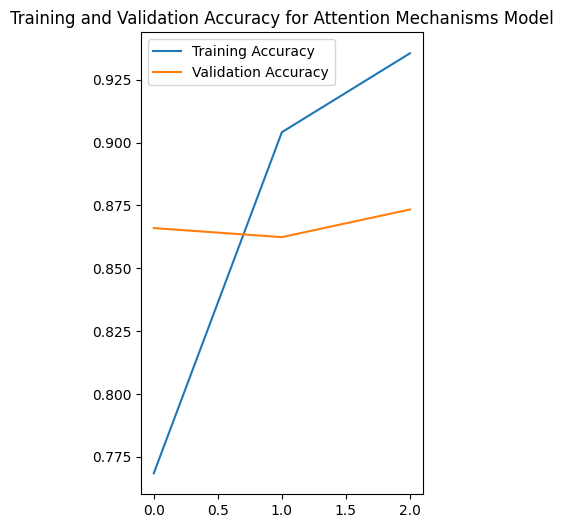

In [663]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Attention Mechanisms Model')
plt.legend()
plt.show()

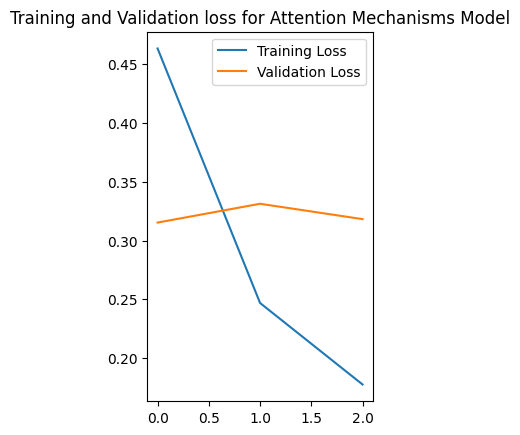

In [664]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation loss for Attention Mechanisms Model')
plt.legend()
plt.show()

### OBSERVATIONS:

1.  This code visualizes model performance after training using the history objects of both the models for the Accuracy and loss.

2.   It depicts about the training and Validation accuracy as well as for loss and Validation loss.

### Step 10: Make the predictions on the test data

In [665]:
word_index = imdb.get_word_index()

def encode_review(text):
    encoded = [1]  # 1 = <START>
    for word in text.lower().split():
        if word in word_index and word_index[word] < 10000:
            encoded.append(word_index[word] + 3)
        else:
            encoded.append(2)  # 2 = <UNKNOWN>
    return pad_sequences([encoded], maxlen = max_len)

review = "This movie was amazing, I really loved it!"
x = encode_review(review)

pred = model.predict(x)[0][0]
print("Positive" if pred > 0.5 else "Negative", pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Positive 0.7928787
